## Running ordinations on Hellinger-transformed data for each soil type

In [1]:
library(phyloseq)
library(wesanderson)
library(ggplot2)
library(vegan)
library(dplyr)

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
ps.hell=readRDS("../data/CornellITS2/ps.ITS2.hell")
ps.hell

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1810 taxa and 177 samples ]
sample_data() Sample Data:       [ 177 samples by 69 sample variables ]
tax_table()   Taxonomy Table:    [ 1810 taxa by 7 taxonomic ranks ]

In [3]:
# Full dataset analysis

ord = ordinate(ps.hell, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(ps.hell), "data.frame")
d = phyloseq::distance(ps.hell, method = "bray")

Run 0 stress 0.09944234 
Run 1 stress 0.1081282 
Run 2 stress 0.09942075 
... New best solution
... Procrustes: rmse 0.03678407  max resid 0.1418833 
Run 3 stress 0.09860651 
... New best solution
... Procrustes: rmse 0.02141112  max resid 0.1332495 
Run 4 stress 0.1033845 
Run 5 stress 0.1067808 
Run 6 stress 0.1036272 
Run 7 stress 0.1014872 
Run 8 stress 0.1087286 
Run 9 stress 0.0989486 
... Procrustes: rmse 0.02910542  max resid 0.09735828 
Run 10 stress 0.09968349 
Run 11 stress 0.1027846 
Run 12 stress 0.0985094 
... New best solution
... Procrustes: rmse 0.01162886  max resid 0.04355072 
Run 13 stress 0.1057372 
Run 14 stress 0.1003041 
Run 15 stress 0.1006962 
Run 16 stress 0.09977649 
Run 17 stress 0.1005208 
Run 18 stress 0.09865679 
... Procrustes: rmse 0.02070082  max resid 0.0831899 
Run 19 stress 0.1080589 
Run 20 stress 0.09983097 
Run 21 stress 0.09895216 
... Procrustes: rmse 0.0303593  max resid 0.1038346 
Run 22 stress 0.09916448 
Run 23 stress 0.09850071 
... New b

Run 258 stress 0.09919529 
Run 259 stress 0.09851442 
Run 260 stress 0.09937169 
Run 261 stress 0.1016069 
Run 262 stress 0.1083535 
Run 263 stress 0.09940119 
Run 264 stress 0.109269 
Run 265 stress 0.09984771 
Run 266 stress 0.09797717 
... Procrustes: rmse 0.004591536  max resid 0.02883975 
Run 267 stress 0.101368 
Run 268 stress 0.1066448 
Run 269 stress 0.1003371 
Run 270 stress 0.1024317 
Run 271 stress 0.1069686 
Run 272 stress 0.1018848 
Run 273 stress 0.09917678 
Run 274 stress 0.0993496 
Run 275 stress 0.1175619 
Run 276 stress 0.09932345 
Run 277 stress 0.09926563 
Run 278 stress 0.1012222 
Run 279 stress 0.09784947 
... New best solution
... Procrustes: rmse 0.003320782  max resid 0.02797018 
Run 280 stress 0.1077118 
Run 281 stress 0.09911386 
Run 282 stress 0.1034608 
Run 283 stress 0.09942503 
Run 284 stress 0.1024118 
Run 285 stress 0.100938 
Run 286 stress 0.1052896 
Run 287 stress 0.1073768 
Run 288 stress 0.09952614 
Run 289 stress 0.1103154 
Run 290 stress 0.1003575


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.09784947 
Stress type 1, weak ties
No convergent solutions - best solution after 500 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 


In [4]:
d.adonis = adonis(d~sample_data(ps.hell)$Soil_Trtmt+sample_data(ps.hell)$Amdmt+sample_data(ps.hell)$Day+
                  sample_data(ps.hell)$Soil_Trtmt*sample_data(ps.hell)$Amdmt+
                  sample_data(ps.hell)$Soil_Trtmt*sample_data(ps.hell)$Day,
                  df)
d.adonis


Call:
adonis(formula = d ~ sample_data(ps.hell)$Soil_Trtmt + sample_data(ps.hell)$Amdmt +      sample_data(ps.hell)$Day + sample_data(ps.hell)$Soil_Trtmt *      sample_data(ps.hell)$Amdmt + sample_data(ps.hell)$Soil_Trtmt *      sample_data(ps.hell)$Day, data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                                                            Df SumsOfSqs
sample_data(ps.hell)$Soil_Trtmt                              4    25.121
sample_data(ps.hell)$Amdmt                                   2     1.892
sample_data(ps.hell)$Day                                     2     1.361
sample_data(ps.hell)$Soil_Trtmt:sample_data(ps.hell)$Amdmt   8     6.125
sample_data(ps.hell)$Soil_Trtmt:sample_data(ps.hell)$Day     8     4.016
Residuals                                                  152    41.881
Total                                                      176    80.395
                                                          

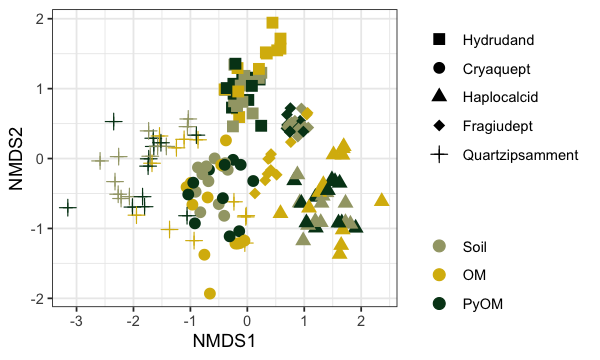

In [5]:
options(repr.plot.width = 5, repr.plot.height = 3)

p = plot_ordination(ps.hell, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Soil_Name")
#palette = c(wes_palette("Darjeeling1"))[c(2,1,4,3,5)]
palette = c(wes_palette("Cavalcanti1"))[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + scale_shape_manual(values=c(15,16,17,18,3))
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p

Run 0 stress 0.1782336 
Run 1 stress 0.2150186 
Run 2 stress 0.2150183 
Run 3 stress 0.1807097 
Run 4 stress 0.1807096 
Run 5 stress 0.1782326 
... New best solution
... Procrustes: rmse 0.000610358  max resid 0.002625774 
... Similar to previous best
Run 6 stress 0.18071 
Run 7 stress 0.234352 
Run 8 stress 0.2034295 
Run 9 stress 0.2410821 
Run 10 stress 0.1782325 
... New best solution
... Procrustes: rmse 0.0001334904  max resid 0.0006364681 
... Similar to previous best
Run 11 stress 0.1807096 
Run 12 stress 0.1870227 
Run 13 stress 0.1807096 
Run 14 stress 0.1807096 
Run 15 stress 0.1782328 
... Procrustes: rmse 0.000216607  max resid 0.001098544 
... Similar to previous best
Run 16 stress 0.1782336 
... Procrustes: rmse 0.0005698089  max resid 0.002474613 
... Similar to previous best
Run 17 stress 0.1782325 
... New best solution
... Procrustes: rmse 0.0001017176  max resid 0.0004458072 
... Similar to previous best
Run 18 stress 0.178234 
... Procrustes: rmse 0.0008641923  max


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1782325 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
sample_data(physeq)$Amdmt  2    1.0546 0.52732  2.0764 0.10152  0.007 **
sample_data(physeq)$Day    2    1.4615 0.73073  2.8774 0.14068  0.004 **
Residuals                 31    7.8726 0.25396         0.75781          
Total                     35   10.3887                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

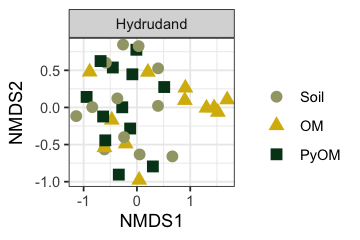

In [3]:
Soil = "Hawaii"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1656758 
Run 1 stress 0.1766533 
Run 2 stress 0.1757113 
Run 3 stress 0.172095 
Run 4 stress 0.1656751 
... New best solution
... Procrustes: rmse 0.002457513  max resid 0.01090526 
Run 5 stress 0.1757113 
Run 6 stress 0.1656751 
... Procrustes: rmse 0.0001416478  max resid 0.0005444199 
... Similar to previous best
Run 7 stress 0.2057254 
Run 8 stress 0.1732208 
Run 9 stress 0.1757112 
Run 10 stress 0.1752372 
Run 11 stress 0.1757111 
Run 12 stress 0.2208455 
Run 13 stress 0.1681641 
Run 14 stress 0.1648238 
... New best solution
... Procrustes: rmse 0.07593823  max resid 0.2283829 
Run 15 stress 0.1767921 
Run 16 stress 0.1656758 
Run 17 stress 0.184006 
Run 18 stress 0.2106145 
Run 19 stress 0.1807153 
Run 20 stress 0.2114493 
Run 21 stress 0.1751038 
Run 22 stress 0.1767919 
Run 23 stress 0.1752446 
Run 24 stress 0.1913347 
Run 25 stress 0.1734995 
Run 26 stress 0.1827473 
Run 27 stress 0.182479 
Run 28 stress 0.1648238 
... Procrustes: rmse 2.587257e-05  max resid 7


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1648238 
Stress type 1, weak ties
Two convergent solutions found after 28 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)  
sample_data(physeq)$Amdmt  2    1.0224 0.51119  1.6602 0.08671  0.059 .
sample_data(physeq)$Day    2    1.2232 0.61161  1.9863 0.10374  0.031 *
Residuals                 31    9.5454 0.30791         0.80955         
Total                     35   11.7910                 1.00000         
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

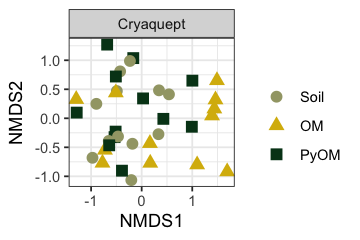

In [4]:
Soil = "Alaska"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1790166 
Run 1 stress 0.1764788 
... New best solution
... Procrustes: rmse 0.1004201  max resid 0.4112926 
Run 2 stress 0.396343 
Run 3 stress 0.1929791 
Run 4 stress 0.1787683 
Run 5 stress 0.1834621 
Run 6 stress 0.2219433 
Run 7 stress 0.193024 
Run 8 stress 0.1764895 
... Procrustes: rmse 0.002135211  max resid 0.008946634 
... Similar to previous best
Run 9 stress 0.176221 
... New best solution
... Procrustes: rmse 0.03119996  max resid 0.1686607 
Run 10 stress 0.1978588 
Run 11 stress 0.1762212 
... Procrustes: rmse 0.000174192  max resid 0.0007793542 
... Similar to previous best
Run 12 stress 0.2335769 
Run 13 stress 0.1834611 
Run 14 stress 0.1849294 
Run 15 stress 0.1834618 
Run 16 stress 0.1834609 
Run 17 stress 0.1766712 
... Procrustes: rmse 0.03199942  max resid 0.1673217 
Run 18 stress 0.1787639 
Run 19 stress 0.18513 
Run 20 stress 0.17667 
... Procrustes: rmse 0.03212915  max resid 0.167267 
*** Solution reached



Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.176221 
Stress type 1, weak ties
Two convergent solutions found after 20 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    1.3992 0.69958  2.3483 0.12354  0.001 ***
sample_data(physeq)$Day    2    0.6914 0.34569  1.1604 0.06105  0.280    
Residuals                 31    9.2351 0.29791         0.81542           
Total                     35   11.3257                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

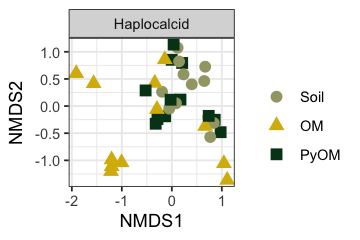

In [5]:
Soil = "Utah"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1120149 
Run 1 stress 0.1140758 
Run 2 stress 0.1147359 
Run 3 stress 0.1138042 
Run 4 stress 0.1121572 
... Procrustes: rmse 0.0031905  max resid 0.01290478 
Run 5 stress 0.1222174 
Run 6 stress 0.1157927 
Run 7 stress 0.1136304 
Run 8 stress 0.1137955 
Run 9 stress 0.1209789 
Run 10 stress 0.112654 
Run 11 stress 0.1180045 
Run 12 stress 0.1173555 
Run 13 stress 0.1179874 
Run 14 stress 0.1190649 
Run 15 stress 0.112654 
Run 16 stress 0.1185003 
Run 17 stress 0.1142017 
Run 18 stress 0.1145432 
Run 19 stress 0.1143456 
Run 20 stress 0.112654 
Run 21 stress 0.1165518 
Run 22 stress 0.1189695 
Run 23 stress 0.113983 
Run 24 stress 0.1229584 
Run 25 stress 0.114075 
Run 26 stress 0.1205538 
Run 27 stress 0.112015 
... Procrustes: rmse 0.0002301558  max resid 0.0006726741 
... Similar to previous best
*** Solution reached



Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1120149 
Stress type 1, weak ties
Two convergent solutions found after 27 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
sample_data(physeq)$Amdmt  2    3.0180 1.50898 10.8799 0.37986  0.001 ***
sample_data(physeq)$Day    2    1.0435 0.52176  3.7619 0.13134  0.001 ***
Residuals                 28    3.8835 0.13870         0.48880           
Total                     32    7.9450                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

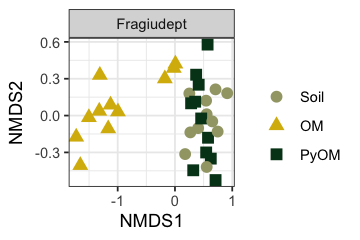

In [6]:
Soil = "New York"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p

Run 0 stress 0.1481171 
Run 1 stress 0.1306986 
... New best solution
... Procrustes: rmse 0.07696813  max resid 0.2716396 
Run 2 stress 0.1308966 
... Procrustes: rmse 0.03990854  max resid 0.1847057 
Run 3 stress 0.1306988 
... Procrustes: rmse 0.0001573172  max resid 0.0008364398 
... Similar to previous best
Run 4 stress 0.1306886 
... New best solution
... Procrustes: rmse 0.003453897  max resid 0.01554958 
Run 5 stress 0.1589503 
Run 6 stress 0.1308966 
... Procrustes: rmse 0.04040961  max resid 0.1849689 
Run 7 stress 0.1308967 
... Procrustes: rmse 0.04051122  max resid 0.1852846 
Run 8 stress 0.1394413 
Run 9 stress 0.129824 
... New best solution
... Procrustes: rmse 0.01549349  max resid 0.06601218 
Run 10 stress 0.1308967 
Run 11 stress 0.1308966 
Run 12 stress 0.1308966 
Run 13 stress 0.1380713 
Run 14 stress 0.1297326 
... New best solution
... Procrustes: rmse 0.00515506  max resid 0.02794879 
Run 15 stress 0.1308966 
Run 16 stress 0.1380715 
Run 17 stress 0.1443681 
Run


Call:
metaMDS(comm = veganifyOTU(physeq), distance = distance, k = 2,      trymax = 500) 

global Multidimensional Scaling using monoMDS

Data:     veganifyOTU(physeq) 
Distance: bray 

Dimensions: 2 
Stress:     0.1297326 
Stress type 1, weak ties
Two convergent solutions found after 22 tries
Scaling: centring, PC rotation, halfchange scaling 
Species: expanded scores based on ‘veganifyOTU(physeq)’ 



Call:
adonis(formula = d ~ sample_data(physeq)$Amdmt + sample_data(physeq)$Day,      data = df) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                          Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
sample_data(physeq)$Amdmt  2    1.5226 0.76131  2.0803 0.11014  0.004 **
sample_data(physeq)$Day    2    0.9570 0.47848  1.3075 0.06922  0.136   
Residuals                 31   11.3447 0.36596         0.82064          
Total                     35   13.8243                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

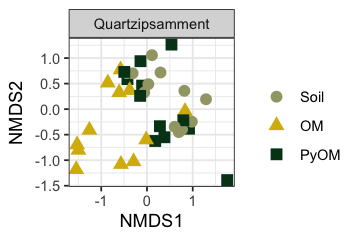

In [7]:
Soil = "Florida"
physeq = prune_samples(sample_data(ps.hell)$Soil_Trtmt==Soil,ps.hell)
ord = ordinate(physeq, "NMDS", "bray", k=2, trymax=500)
ord
df = as(sample_data(physeq), "data.frame")
d = phyloseq::distance(physeq, method = "bray")

d.adonis = adonis(d~sample_data(physeq)$Amdmt+
                  sample_data(physeq)$Day,
                  df)
d.adonis

options(repr.plot.width = 3, repr.plot.height = 2)

p = plot_ordination(physeq, ord, axes=c(1,2), type="samples", color="Amdmt",shape="Amdmt")
palette = c(wes_palette("Cavalcanti1"))
palette = palette[c(3,1,2)]
p = p + theme_bw()
p = p + scale_color_manual(values=palette)
p = p + geom_point(size=3)
p = p + guides(shape = guide_legend(title=""), color=guide_legend(title=""))
p = p + facet_wrap(~Soil_Name)
p